In [3]:
# Import necessary libraries
import pandas as pd

# Load the raw EEG dataset
df = pd.read_csv(r"C:\Users\athar\Downloads\eeg_raw_data.csv")


# Display the first few rows of the dataset to understand its structure
print(df.head())


                    Timestamp  Alpha Power  Beta Power  Theta Power  \
0  2024-10-22 20:59:49.898714    28.727006    5.942876    14.840633   
1  2024-10-22 21:04:49.898714    57.535715   24.092312     3.682799   
2  2024-10-22 21:09:49.898714    46.599697   14.430679     5.232574   
3  2024-10-22 21:14:49.898714    39.932924   20.257121    19.971084   
4  2024-10-22 21:19:49.898714    17.800932   32.226994    14.128581   

   Gamma Power  
0     1.775226  
1     8.970319  
2     9.109527  
3    10.561449  
4    11.891370  


In [4]:
# Step 2: Extract the features (Alpha, Beta, Theta, Gamma power)
features = ['Alpha Power', 'Beta Power', 'Theta Power', 'Gamma Power']
X = df[features]

# Display first few rows of the feature data
print(X.head())


   Alpha Power  Beta Power  Theta Power  Gamma Power
0    28.727006    5.942876    14.840633     1.775226
1    57.535715   24.092312     3.682799     8.970319
2    46.599697   14.430679     5.232574     9.109527
3    39.932924   20.257121    19.971084    10.561449
4    17.800932   32.226994    14.128581    11.891370


In [5]:
# Step 3: Simulate binary labels (0 for Resting State, 1 for Active State)
import numpy as np

# Simulating random labels (binary classification)
np.random.seed(42)
df['Label'] = np.random.randint(0, 2, size=len(df))

# Display the first few rows with the labels
print(df[['Timestamp', 'Alpha Power', 'Label']].head())


                    Timestamp  Alpha Power  Label
0  2024-10-22 20:59:49.898714    28.727006      0
1  2024-10-22 21:04:49.898714    57.535715      1
2  2024-10-22 21:09:49.898714    46.599697      0
3  2024-10-22 21:14:49.898714    39.932924      0
4  2024-10-22 21:19:49.898714    17.800932      0


In [6]:
# Step 4: Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled training data
print(X_train_scaled[:5])


[[ 1.80128424 -1.14791984  0.66600321 -1.56790032]
 [ 0.18151327  0.03226737  1.63067153 -1.68595953]
 [-0.52021911  0.57596387 -1.63701715  1.01399114]
 [ 0.44201558 -1.68112342  1.36872537 -0.35305048]
 [ 0.32989749  0.48304904 -0.49859613  0.91759915]]


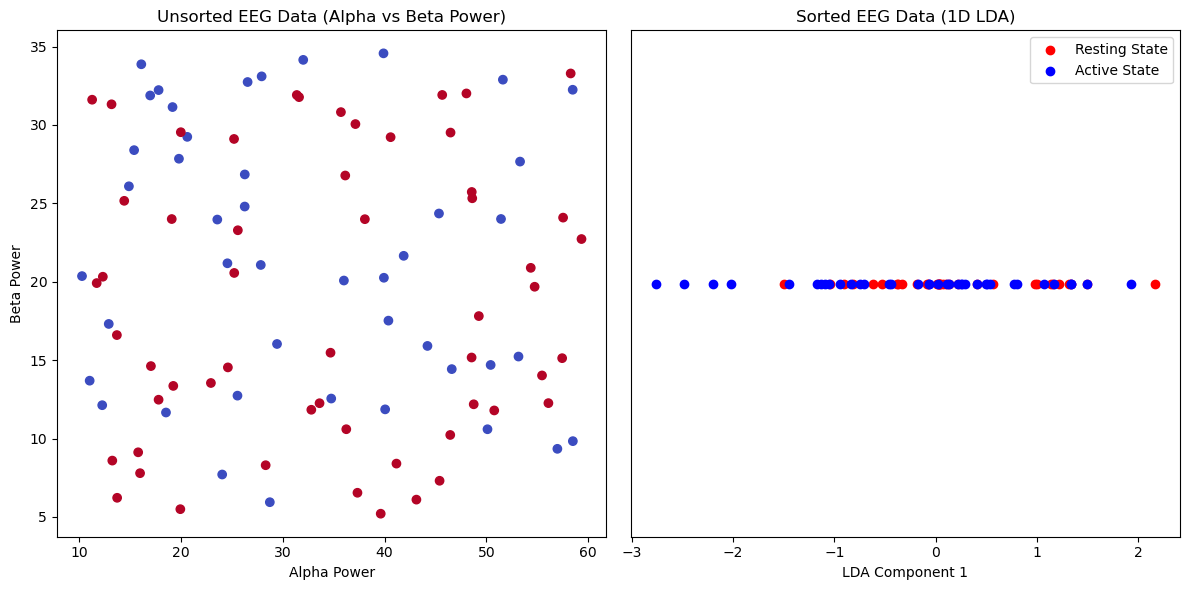

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Visualize the Unsorted Data (Original EEG features)
plt.figure(figsize=(12, 6))

# Plot Alpha Power vs Beta Power (as an example)
plt.subplot(1, 2, 1)
plt.scatter(df['Alpha Power'], df['Beta Power'], c=df['Label'], cmap='coolwarm', label='Unsorted Data')
plt.title('Unsorted EEG Data (Alpha vs Beta Power)')
plt.xlabel('Alpha Power')
plt.ylabel('Beta Power')

# Step 2: Visualize the Sorted Data (LDA-transformed data)
# Since we are working with 1D LDA (because of binary classification), plot in 1D
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), color='red', label='Resting State')
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), color='blue', label='Active State')
plt.title('Sorted EEG Data (1D LDA)')
plt.xlabel('LDA Component 1')
plt.yticks([])  # Hide the y-axis since we are in 1D
plt.legend()

# Show both plots
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

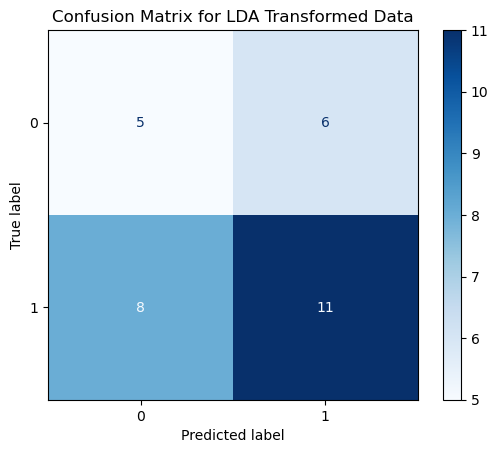

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'df' is your DataFrame with features and labels
# Define your features (e.g., Alpha Power, Beta Power) and labels
X = df[['Alpha Power', 'Beta Power']].values  # Example feature columns
y = df['Label'].values  # Labels (ensure it's numeric)

# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Apply LDA to the training data
lda = LDA(n_components=1)  # 1 component for binary classification
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 3: Train a classifier (Logistic Regression) on the LDA-transformed data
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Step 4: Make predictions on the test set
y_pred = classifier.predict(X_test_lda)

# Step 5: Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

# Step 6: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for LDA Transformed Data')
plt.show()


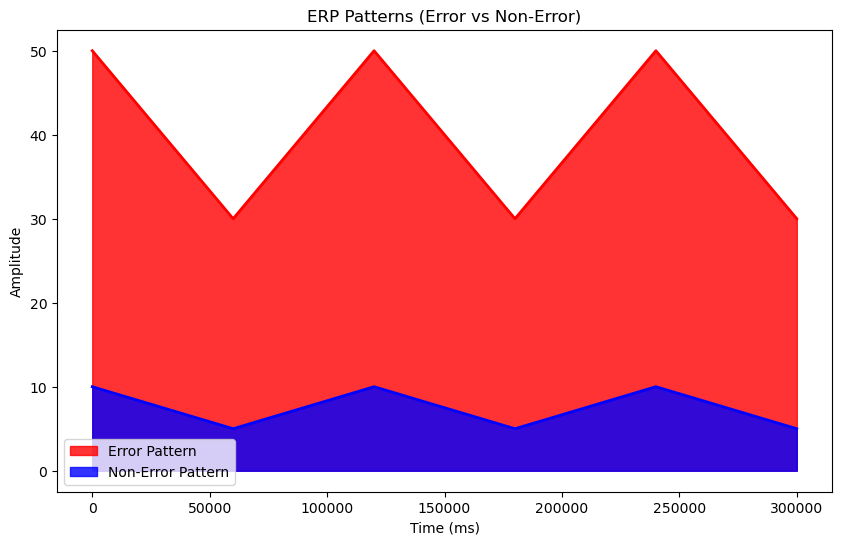

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Example data (time in milliseconds, amplitude values for Error and Non-Error patterns)
time = np.linspace(0, 300000, 6)  # Time in milliseconds
error_pattern = [50, 30, 50, 30, 50, 30]  # Amplitude for Error Pattern
non_error_pattern = [10, 5, 10, 5, 10, 5]  # Amplitude for Non-Error Pattern

# Plotting the error pattern
plt.figure(figsize=(10, 6))

# Error Pattern (Red filled pattern)
plt.fill_between(time, error_pattern, color='red', alpha=0.8, label='Error Pattern')

# Non-Error Pattern (Blue filled pattern)
plt.fill_between(time, non_error_pattern, color='blue', alpha=0.8, label='Non-Error Pattern')

# Plotting the lines for clarity
plt.plot(time, error_pattern, color='red', lw=2)
plt.plot(time, non_error_pattern, color='blue', lw=2)

# Adding labels and title
plt.title('ERP Patterns (Error vs Non-Error)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Adding legend
plt.legend()

# Show the plot
plt.show()


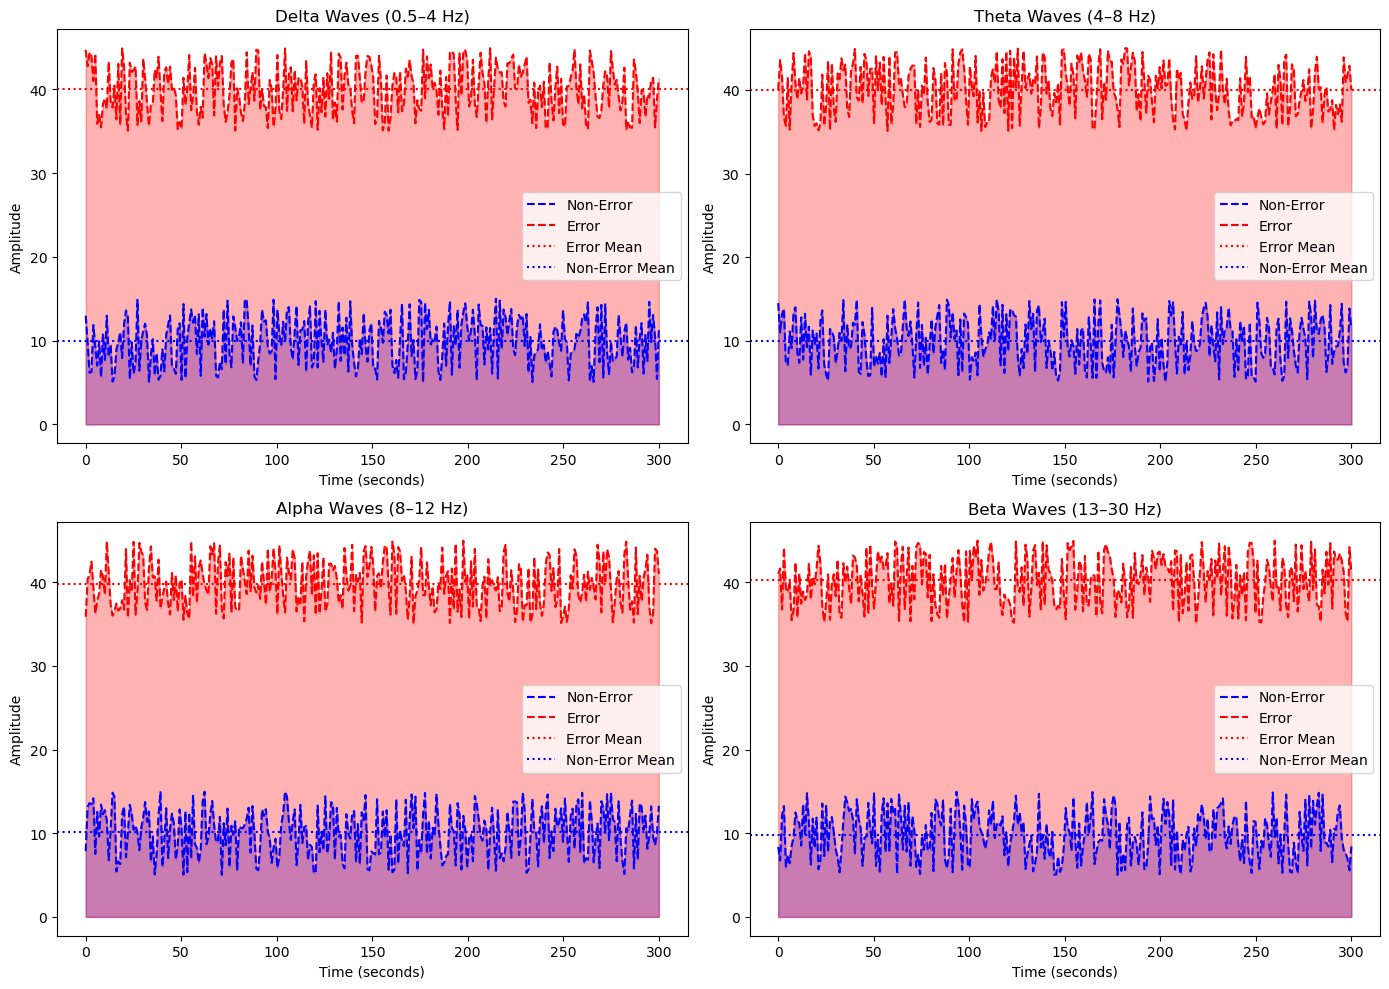

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Example time in seconds
time = np.linspace(0, 300, 300)  # 300 seconds

# Example data for each wave band for both "Error" and "Non-Error" scenarios
error_data = {
    "Delta": np.random.uniform(35, 45, 300),  # Delta waves (0.5-4 Hz)
    "Theta": np.random.uniform(35, 45, 300),  # Theta waves (4-8 Hz)
    "Alpha": np.random.uniform(35, 45, 300),  # Alpha waves (8-12 Hz)
    "Beta": np.random.uniform(35, 45, 300),   # Beta waves (13-30 Hz)
}

non_error_data = {
    "Delta": np.random.uniform(5, 15, 300),
    "Theta": np.random.uniform(5, 15, 300),
    "Alpha": np.random.uniform(5, 15, 300),
    "Beta": np.random.uniform(5, 15, 300),
}

# Calculate means
error_means = {band: np.mean(data) for band, data in error_data.items()}
non_error_means = {band: np.mean(data) for band, data in non_error_data.items()}

# Plot the EEG data for each band in subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

wave_bands = ["Delta", "Theta", "Alpha", "Beta"]
titles = ["Delta Waves (0.5–4 Hz)", "Theta Waves (4–8 Hz)", "Alpha Waves (8–12 Hz)", "Beta Waves (13–30 Hz)"]

for i, band in enumerate(wave_bands):
    ax = axs[i // 2, i % 2]
    
    # Plot Non-Error data
    ax.plot(time, non_error_data[band], 'b--', label='Non-Error')
    ax.fill_between(time, non_error_data[band], color='blue', alpha=0.3)
    
    # Plot Error data
    ax.plot(time, error_data[band], 'r--', label='Error')
    ax.fill_between(time, error_data[band], color='red', alpha=0.3)
    
    # Plot means
    ax.axhline(y=error_means[band], color='red', linestyle=':', label='Error Mean')
    ax.axhline(y=non_error_means[band], color='blue', linestyle=':', label='Non-Error Mean')
    
    # Set labels and title
    ax.set_title(titles[i])
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Amplitude")
    ax.legend()

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()
